## Group B Machine Learning

## Assignment 6

### Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.
#### Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
282,7,133,88,15,155,32.4,0.262,37,0
458,10,148,84,48,237,37.6,1.001,51,1
420,1,119,88,41,170,45.3,0.507,26,0
66,0,109,88,30,0,32.5,0.855,38,1
385,1,119,54,13,50,22.3,0.205,24,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
x=df.drop(['Outcome'],axis=1)
x.shape

(768, 8)

In [10]:
y=df['Outcome']
y.shape

(768,)

In [11]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

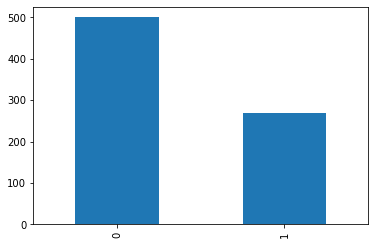

In [13]:
df['Outcome'].value_counts().plot(kind='bar')

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=31,stratify=y)

<AxesSubplot:>

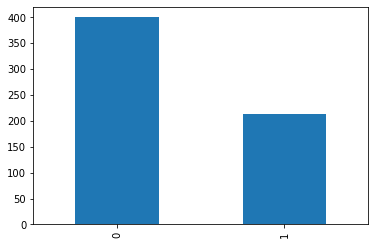

In [15]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

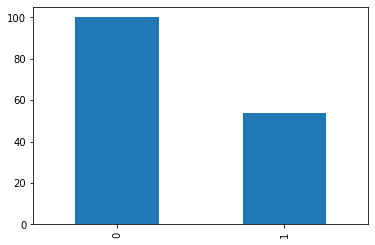

In [16]:
y_test.value_counts().plot(kind='bar')

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn_model.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score : ",accuracy )

Accuracy Score :  0.7077922077922078


In [20]:
recall = recall_score(y_test,y_pred)
print("Recall Score : ",recall)

Recall Score :  0.5740740740740741


In [21]:
precision = precision_score(y_test,y_pred)
print("Precision Score : ",precision)

Precision Score :  0.5849056603773585


In [22]:
f1_score = f1_score(y_test,y_pred)
print("F1 Score : ",f1_score)

F1 Score :  0.5794392523364486


In [23]:
fbeta_05 = fbeta_score(y_test,y_pred,beta=0.5)
print("Fbeta_0.5 Score : ",fbeta_05)

Fbeta_0.5 Score :  0.5827067669172932


In [24]:
fbeta_1 = fbeta_score(y_test,y_pred,beta=1)
print("Fbeta_1 Score : ",fbeta_1)

Fbeta_1 Score :  0.5794392523364486


In [25]:
fbeta_2 = fbeta_score(y_test,y_pred,beta=2)
print("Fbeta_2 Score : ",fbeta_2)

Fbeta_2 Score :  0.5762081784386617


In [26]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[78, 22],
       [23, 31]], dtype=int64)

In [27]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       100
           1       0.58      0.57      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



In [28]:
result = pd.DataFrame(columns=["Accuracy","Precision","Recall","FBeta_0.5","FBeta_1","FBeta_2"])
result

,Accuracy,Precision,Recall,FBeta_0.5,FBeta_1,FBeta_2


In [29]:
result.loc["KNN"] = [accuracy,precision,recall,fbeta_05,fbeta_1,fbeta_2]
result

,Accuracy,Precision,Recall,FBeta_0.5,FBeta_1,FBeta_2
KNN,0.707792,0.584906,0.574074,0.582707,0.579439,0.576208


### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Pedigree'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

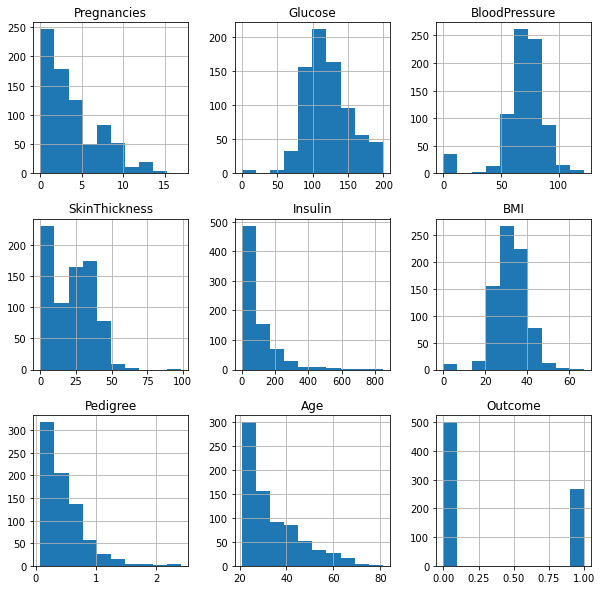

In [30]:
fig, axis = plt.subplots(3,3,figsize=(10, 10))
df.hist(ax=axis)

<AxesSubplot:>

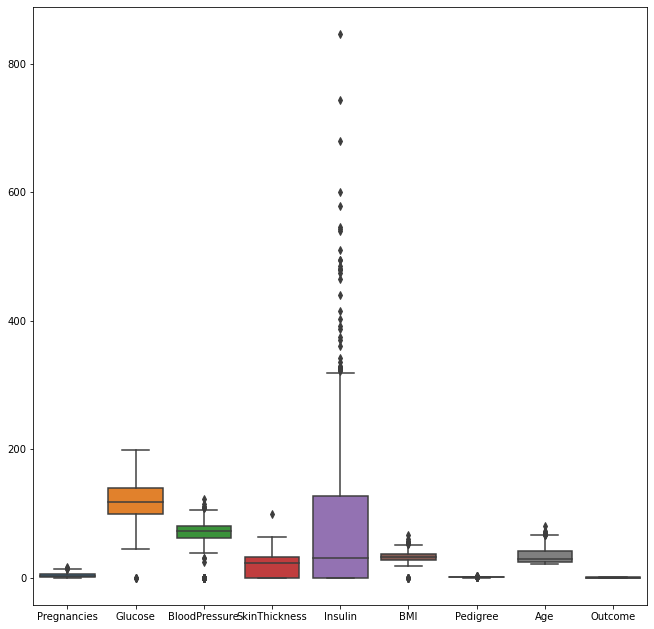

In [31]:
plt.figure(figsize=(11,11))
sns.boxplot(data=df)

#### Outlier treatment

In [32]:
def remove_outlier(dataframe , col):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    dataframe[col] = np.clip(dataframe[col] , lower_whisker , upper_whisker)
    return dataframe

In [33]:
def treat_outliers_all(dataframe , col_list):
    for c in col_list:
        dataframe = remove_outlier(dataframe , c)
    return dataframe

In [34]:
 df1 = treat_outliers_all(df, df.columns)

<AxesSubplot:>

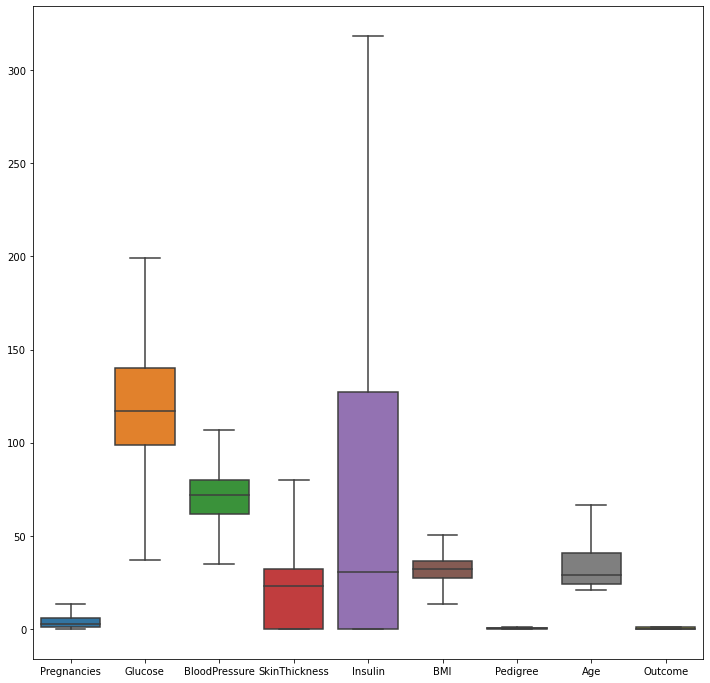

In [35]:
plt.figure(figsize=(12,12))
sns.boxplot(data= df1)

### Features Scaling

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Pedigree'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

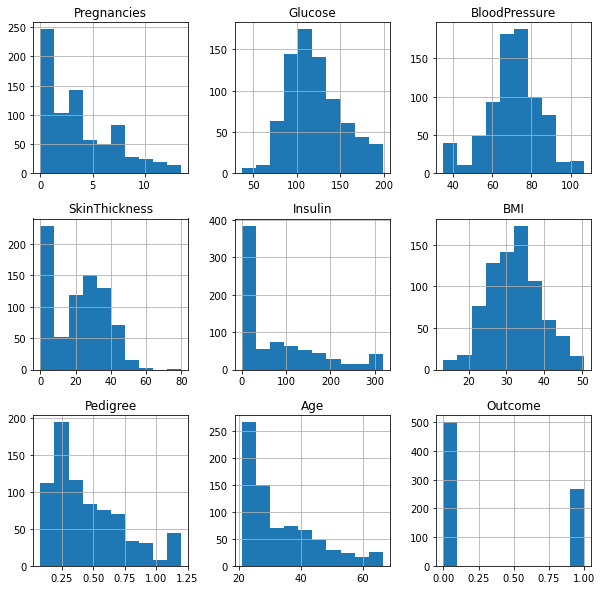

In [36]:
fig, axis = plt.subplots(3,3,figsize=(10, 10))
df1.hist(ax=axis)

In [37]:
x1=df1.drop('Outcome',axis=1)
y1=df1['Outcome']
print(x1.shape)
print(y1.shape)

(768, 8)
(768,)


In [38]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.2,random_state=31,stratify=y)

In [39]:
# std_scaler = StandardScaler()
# x_train_scaled = std_scaler.fit_transform(x_train1)
# x_test_scaled = std_scaler.fit_transform(x_test1)

In [40]:
# x_train_scaled

In [41]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train1)
x_test_scaled = scaler.transform(x_test1)

In [42]:
x_train_scaled

array([[0.22222222, 0.42548263, 0.26388889, ..., 0.47177419, 0.19073084,
        0.06593407],
       [0.2962963 , 0.33899614, 0.625     , ..., 0.77553763, 0.14171123,
        0.17582418],
       [0.2962963 , 0.55521236, 0.73611111, ..., 0.56854839, 0.46345811,
        0.15384615],
       ...,
       [0.2962963 , 0.9011583 , 0.        , ..., 0.40456989, 0.11942959,
        0.32967033],
       [0.51851852, 0.87644788, 0.83333333, ..., 0.56048387, 0.07664884,
        0.85714286],
       [0.74074074, 0.68494208, 0.68055556, ..., 0.65188172, 0.82263815,
        0.65934066]])

In [43]:
x_test_scaled

array([[0.14814815, 0.62934363, 0.55555556, ..., 0.32930108, 0.07932264,
        0.17582418],
       [0.66666667, 0.53050193, 0.48611111, ..., 0.53091398, 0.26381462,
        0.41758242],
       [0.        , 0.86409266, 0.34722222, ..., 0.57123656, 0.885918  ,
        0.        ],
       ...,
       [0.59259259, 0.38841699, 0.56944444, ..., 0.68145161, 0.09982175,
        0.46153846],
       [0.66666667, 0.21544402, 0.59722222, ..., 0.4905914 , 0.18003565,
        0.37362637],
       [0.14814815, 0.51196911, 0.26388889, ..., 0.36155914, 0.33600713,
        0.13186813]])

In [44]:
x_train_scaled_ = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled_

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.222222,0.425483,0.263889,0.333333,0.496660,0.471774,0.190731,0.065934
1,0.296296,0.338996,0.625000,0.000000,0.000000,0.775538,0.141711,0.175824
2,0.296296,0.555212,0.736111,0.174603,0.487230,0.568548,0.463458,0.153846
3,0.518519,0.697297,0.597222,0.460317,0.396071,0.587366,0.547237,0.725275
4,0.148148,0.332819,0.375000,0.000000,0.000000,0.375000,0.398396,0.021978
...,...,...,...,...,...,...,...,...
609,0.074074,0.388417,0.513889,0.190476,0.220039,0.321237,0.516934,0.153846
610,0.518519,0.505792,0.000000,0.000000,0.000000,0.318548,0.116756,0.351648
611,0.296296,0.901158,0.000000,0.000000,0.000000,0.404570,0.119430,0.329670
612,0.518519,0.876448,0.833333,0.492063,0.000000,0.560484,0.076649,0.857143


In [45]:
x_test_scaled_ = pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_scaled_

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.148148,0.629344,0.555556,0.000000,0.000000,0.329301,0.079323,0.175824
1,0.666667,0.530502,0.486111,0.698413,0.295481,0.530914,0.263815,0.417582
2,0.000000,0.864093,0.347222,0.460317,1.000000,0.571237,0.885918,0.000000
3,0.296296,0.666409,0.652778,0.285714,0.000000,0.514785,0.139929,1.000000
4,0.222222,0.456371,0.291667,0.619048,0.000000,0.450269,0.426916,0.197802
...,...,...,...,...,...,...,...,...
149,0.000000,0.351351,0.000000,0.000000,0.000000,0.000000,0.158645,0.087912
150,0.074074,0.369884,0.430556,0.238095,0.440079,0.264785,0.364528,0.021978
151,0.592593,0.388417,0.569444,0.000000,0.000000,0.681452,0.099822,0.461538
152,0.666667,0.215444,0.597222,0.396825,0.000000,0.490591,0.180036,0.373626


### SMOTE for Imbalanced classification

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote_object = SMOTE()  

In [48]:
x_sampled, y_sampled = smote_object.fit_resample(x1,y1)

In [49]:
x_sampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6.000000,148.000000,72.000000,35.000000,0.000000,33.600000,0.627000,50.000000
1,1.000000,85.000000,66.000000,29.000000,0.000000,26.600000,0.351000,31.000000
2,8.000000,183.000000,64.000000,0.000000,0.000000,23.300000,0.672000,32.000000
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000
4,0.000000,137.000000,40.000000,35.000000,168.000000,43.100000,1.200000,33.000000
...,...,...,...,...,...,...,...,...
995,1.816354,171.455764,70.721178,48.047588,318.125000,41.828553,0.713565,29.632707
996,0.000000,137.301212,46.024242,35.000000,167.698788,40.539697,0.999393,29.385455
997,0.081125,151.011589,89.976821,45.976821,0.000000,42.191555,0.370606,21.173839
998,6.546964,132.709393,74.324857,0.000000,0.000000,33.335911,0.308360,40.453036


In [50]:
x_sampled.shape

(1000, 8)

In [51]:
y_sampled.shape

(1000,)

<AxesSubplot:>

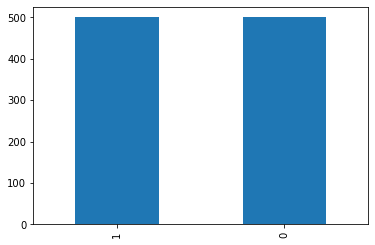

In [52]:
y_sampled.value_counts().plot(kind='bar')

### Build a model

In [53]:
x_train_sampled,x_test_sampled,y_train_sampled,y_test_sampled = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=42)

In [54]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_sampled,y_train_sampled)
y_pred1 = knn_model.predict(x_test_sampled)
accuracy = accuracy_score(y_test_sampled,y_pred1)
recall = recall_score(y_test_sampled,y_pred1)
precision = precision_score(y_test_sampled,y_pred1)
fbeta_05 = fbeta_score(y_test_sampled,y_pred1,beta = 0.5)
fbeta_1 = fbeta_score(y_test_sampled,y_pred1,beta = 1)
fbeta_2 = fbeta_score(y_test_sampled,y_pred1,beta = 2)
result.loc["KNN SMOTE"] = [accuracy,precision,recall,fbeta_05,fbeta_1,fbeta_2]
result

,Accuracy,Precision,Recall,FBeta_0.5,FBeta_1,FBeta_2
KNN,0.707792,0.584906,0.574074,0.582707,0.579439,0.576208
KNN SMOTE,0.765000,0.732759,0.841584,0.752212,0.783410,0.817308


In [55]:
matrix = confusion_matrix(y_test_sampled,y_pred1)
matrix

array([[68, 31],
       [16, 85]], dtype=int64)

In [56]:
report = classification_report(y_test_sampled,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.73      0.84      0.78       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200

